# Smart Trash Cans
We'll be looking at a dataset that contains hundreds of smart trash cans in different neighborhoods accross Pittsburgh, in order to see which neighborhood has the most amount of smart trash cans.

The smart trash cans, that the city of Pittsburgh has employed, have built in sensors that detect how full it is. This innovation allows the labor force in Pittsburgh to not have to waste as much time on emptying trash can, and they can use that time to tidy up their respective areas. "'Based on our analysis, we expect that the smart litter cans will give us the ability to make process improvements that will reduce the amount of labor hours spent on emptying garbage cans by at least half,' said Matt Jacob, the project manager for the program for the Department of Innovation and Performance. 'As a result, DPW will be able to reallocate those resources to other tasks.'" (From source: https://pittsburghpa.gov/press-releases/press-releases.html?id=2986). 

# Dataset: 
My dataset is from [WPRDC](https://data.wprdc.org/dataset/smart-trash-containers). By itself, the CSV contains several columns that do not suit my purpose (container id, assignment date, and so forth); so I decided to group it by the neighborhoods and focus on the amount of trash cans for each neighborhood. 

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

# All unique neighborhoods with a smart trash can. As you can see, you can't tell anything from this data
SmartTCans = pd.read_csv("SmartTCansNew.csv")
print(SmartTCans["neighborhood"].unique())

['Central Northside' 'Allegheny Center' 'California-Kirkbride'
 'Marshall-Shadeland' 'Manchester' 'Perry North' 'Perry South' 'Fineview'
 'Allegheny West' 'Troy Hill' 'East Allegheny' 'Brighton Heights'
 'Spring Hill-City View' 'Spring Garden' 'Northview Heights' 'Chateau'
 'Bluff' 'Garfield' 'Arlington' 'Greenfield' 'East Liberty' 'Morningside'
 'Mt. Oliver' 'Carrick' 'Beechview' 'Point Breeze'
 'Central Business District' 'Shadyside' 'Bloomfield' 'Brookline'
 'South Oakland' 'Highland Park' 'South Side Flats' 'South Side Slopes'
 'Allentown' 'West End' 'Knoxville' 'Beltzhoover' 'Central Oakland'
 'Larimer' 'South Shore' 'Mount Washington' 'Sheraden' 'Crafton Heights'
 'Elliott' 'Westwood' 'Windgap' 'East Carnegie' 'Crawford-Roberts'
 'North Shore' 'Strip District' 'Upper Hill' 'Polish Hill'
 'Squirrel Hill South' 'Central Lawrenceville' 'Duquesne Heights'
 'Bedford Dwellings' 'North Oakland' 'Middle Hill' 'Lower Lawrenceville'
 'Banksville' 'Terrace Village' 'Hazelwood' 'West Oakland

In [3]:
# Group the csv by neighbohood and sum up all of the trashcans by neighborhood
num_cans = SmartTCans.groupby("neighborhood").sum()['Number of Cans']
num_cans2 = num_cans.sort_values(ascending=False)
print(num_cans2.to_string())

neighborhood
Shadyside                    77
East Liberty                 68
Squirrel Hill South          64
Bloomfield                   59
South Side Flats             56
North Shore                  52
Strip District               41
Central Oakland              39
Carrick                      38
Bluff                        32
Homewood South               30
Lower Lawrenceville          29
Central Lawrenceville        29
Middle Hill                  29
East Allegheny               26
Mount Washington             24
Brighton Heights             22
Squirrel Hill North          22
Crawford-Roberts             22
Larimer                      20
Perry North                  16
Point Breeze                 16
Sheraden                     16
Brookline                    16
Upper Lawrenceville          16
Marshall-Shadeland           15
Troy Hill                    15
Hazelwood                    15
North Oakland                15
Allegheny West               14
Greenfield                 

#### As you can see, Shadyside has the most smart trash cans while several others have only one. However, this can mapped onto a map of Pittsburgh to show more accuratley the concentration of smart trash cans to give us better context.

In [4]:
# Import geopandas and create a neighborhoods file
import geopandas
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")

In [5]:
cans_map = neighborhoods.merge(num_cans, how='left', left_on='hood', right_on='neighborhood')
# cans_map[['hood','Number of Cans','geometry']].head()

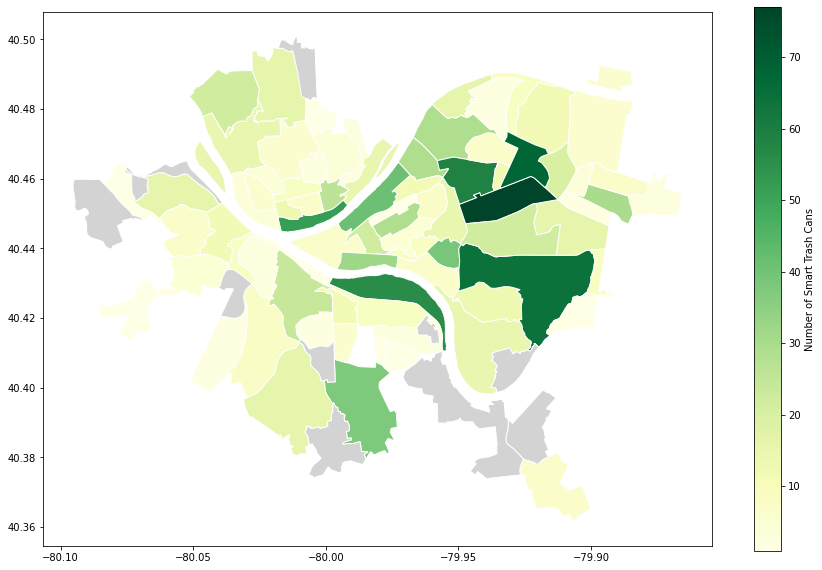

In [6]:
# Plots the concentration of trash cans
cans_map.plot(column='Number of Cans', # set the data to be used for coloring
               cmap='YlGn',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Number of Smart Trash Cans"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set districts with no data to gray
               )

# Final Analysis
It seems that ShadySide had the most smart trash cans with 77; whereas, neighborhoods such as East Carnegie and Mt. Oliver have 1 smart trash can total. Now, judging by the map, Shadyside has one of the most, if not the most, area out all of the other neighborhoods, and so it makes sense that Shadyside will have the most smart trash cans. However, this works to its advantage as to cover and maintain this large area the labor force musn't have to unncessarily waste their time emptying many trash cans. So, the use of smart trash cans allows them to spend more time tidying Shadyside.